シミュレーションを実行中...
シミュレーション完了。


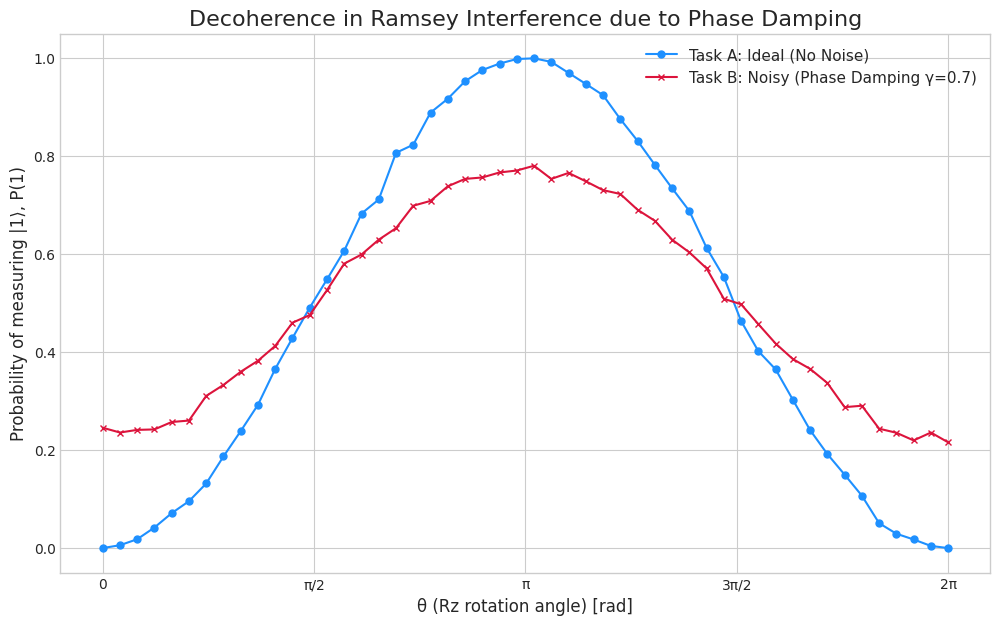

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, phase_damping_error

# --- 1. シミュレーションの基本パラメータ設定 ---
shots = 2048
num_qubits = 1
theta_range = np.linspace(0, 2 * np.pi, 50)

# --- 2. ノイズモデルの定義 (タスクB用) ---
phase_damping_strength = 0.7
noise_model = NoiseModel()

# 位相ダンピングエラーを定義
error = phase_damping_error(phase_damping_strength)

# エラーを'rz'ゲートに適用する際、対象となる量子ビットを指定
noise_model.add_quantum_error(error, ['rz'], [0])

# --- 3. シミュレータの準備 ---
# タスクA: ノイズなしの理想的なシミュレータ
simulator_ideal = AerSimulator()

# タスクB: 位相ダンピングノイズモデルを設定したシミュレータ
simulator_noisy = AerSimulator(noise_model=noise_model)

# --- 4. シミュレーションの実行 ---
ideal_probs = []
noisy_probs = []

print("シミュレーションを実行中...")

for theta in theta_range:
    # ラムゼイ干渉回路の構築
    qc = QuantumCircuit(num_qubits, num_qubits)
    qc.h(0)
    qc.rz(theta, 0)
    qc.h(0)
    qc.measure(0, 0)

    # --- タスクA: 理想系での実行 ---
    job_ideal = simulator_ideal.run(qc, shots=shots)
    result_ideal = job_ideal.result()
    counts_ideal = result_ideal.get_counts(0)
    p1_ideal = counts_ideal.get('1', 0) / shots
    ideal_probs.append(p1_ideal)

    # --- タスクB: ノイズ系での実行 ---
    job_noisy = simulator_noisy.run(qc, shots=shots)
    result_noisy = job_noisy.result()
    counts_noisy = result_noisy.get_counts(0)
    p1_noisy = counts_noisy.get('1', 0) / shots
    noisy_probs.append(p1_noisy)

print("シミュレーション完了。")

# --- 5. 結果のプロット ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# 理想系とノイズ系の結果をプロット
plt.plot(theta_range, ideal_probs, 'o-', label='Task A: Ideal (No Noise)', color='dodgerblue', markersize=5)
plt.plot(theta_range, noisy_probs, 'x-', label=f'Task B: Noisy (Phase Damping γ={phase_damping_strength})', color='crimson', markersize=5)

# グラフの装飾
plt.title("Decoherence in Ramsey Interference due to Phase Damping", fontsize=16)
plt.xlabel("θ (Rz rotation angle) [rad]", fontsize=12)
plt.ylabel("Probability of measuring |1⟩, P(1)", fontsize=12)
plt.xticks(
    [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
    ['0', 'π/2', 'π', '3π/2', '2π']
)
plt.ylim([-0.05, 1.05])
plt.legend(fontsize=11)
plt.grid(True)
plt.show()